# Classification using Deep neural network
## Multiclass classification using Deep Neural Networks: Example: Use the OCR letter recognition dataset https://archive.ics.uci.edu/ml/datasets/letter+recognition

* Dataset Description:
The objective is to identify each of a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English alphabet.
The character images were based on 20 different fonts and each letter within these 20 fonts was randomly distorted to produce a file of 20,000 unique stimuli.  Each stimulus was converted into 16 primitive numerical attributes (statistical moments and edge counts) which were then scaled to fit into a range of integer values from 0 through 15.

### Import libraries

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow import keras

### Read the dataset

In [ ]:
# Verify the dataset path
df = pd.read_csv('./letter-recognition.data')

In [3]:
df.shape

(19999, 17)

In [4]:
df.columns

Index(['T', '2', '8', '3', '5', '1', '8.1', '13', '0', '6', '6.1', '10', '8.2',
       '0.1', '8.3', '0.2', '8.4'],
      dtype='object')

In [5]:
df.isna().sum()

,0
T,0
2,0
8,0
3,0
5,0
1,0
8.1,0
13,0
0,0
6,0


In [6]:
df.sample()

,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
5393,Q,5,8,7,9,7,9,7,7,2,5,8,9,5,9,7,11


In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler()

In [9]:
pixel_data = df.iloc[:, 1:]

In [10]:
pixel_scaled = scaler.fit_transform(pixel_data)

In [11]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [12]:
X

,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
0,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19995,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19996,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19997,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [13]:
y.shape

(19999,)

In [14]:
y.unique()

array(['I', 'D', 'N', 'G', 'S', 'B', 'A', 'J', 'M', 'X', 'O', 'R', 'F',
       'C', 'T', 'H', 'W', 'L', 'P', 'E', 'V', 'Y', 'Q', 'U', 'K', 'Z'],
      dtype=object)

## Encode the categorical data into numerical data

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()

In [17]:
y_encoded = le.fit_transform(y)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [20]:
model = keras.Sequential([

        keras.layers.Dense(128, activation='relu', input_shape=(16,)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(26, activation='softmax')
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [34]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9082 - loss: 0.2946 - val_accuracy: 0.8792 - val_loss: 0.3615
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9097 - loss: 0.2877 - val_accuracy: 0.9022 - val_loss: 0.3137
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9211 - loss: 0.2585 - val_accuracy: 0.9003 - val_loss: 0.3025
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9182 - loss: 0.2546 - val_accuracy: 0.9038 - val_loss: 0.2920
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9188 - loss: 0.2466 - val_accuracy: 0.8953 - val_loss: 0.3180
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9313 - loss: 0.2158 - val_accuracy: 0.9147 - val_loss: 0.2680
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9294 - loss: 0.2230 - val_accuracy: 0.9227 - val_loss: 0.2492
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9356 - loss: 0.2014 - val_accuracy: 0.

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [36]:
# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Mean Absolute Error: {test_mae}")

# Get predictions on the test set
y_pred = model.predict(X_test)

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)  # Get the index of the highest probability

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_labels)
mse = mean_squared_error(y_test, y_pred_labels)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_labels)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9206 - loss: 0.2444
Test Loss: 0.23017220199108124
Test Mean Absolute Error: 0.9244999885559082
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Mean Absolute Error (MAE): 0.6045
Mean Squared Error (MSE): 7.0865
Root Mean Squared Error (RMSE): 2.6620480837129894
R-squared (R2): 0.8728966693461379


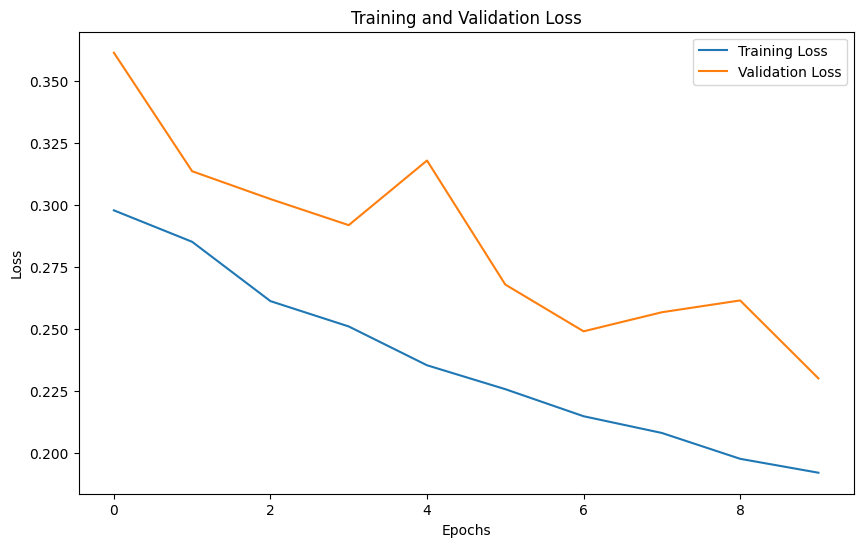

In [39]:
# Visualization: Actual vs. Predicted values
# plt.figure(figsize=(10, 6))
# plt.scatter(y_test, y_pred_labels)
# plt.xlabel("Actual Values")
# plt.ylabel("Predicted Values")
# plt.title("Actual vs. Predicted Values")
# plt.show()

# Visualization: learning curves.
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()